<a href="https://colab.research.google.com/github/Fabriciome/Tarefas-Awari/blob/main/Tarefa_Classifica%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![](https://i.imgur.com/JsMvGnP.png)

# Projeto - Classificação

## 1. Considerações iniciais

Neste notebook iremos praticar a construção de um modelo de Machine Learning. Na atividade, iremos utilizar um algoritmo para realizar um processo de classificação. 

Como o foco da atividade será percorrer o fluxo do Aprendizado de Máquina por inteiro (ou o máximo dele), evitaremos, propositalmente, adentrar em algoritmos e explicações mais complexas.


### 1.1. O Problema de Negócio

A _churn rate_ (taxa de rotatividade ou cancelamento) é a porcentagem de assinantes que interrompem suas assinaturas de um serviço dentro de um determinado período de tempo. Para uma empresa expandir sua clientela, sua taxa de crescimento, medida pelo número de novos clientes, deve exceder sua taxa de cancelamento (_churn rate_).

Portanto, neste projeto, um banco deseja que você construa um modelo de Machine Learning que possa prever a probabilidade de seus clientes atuais fecharem suas contas em um futuro próximo e, portanto, calcular sua _churn rate_.

Esse é um problema de classificação no qual você classifica se um cliente irá sair (y=1) ou permanecer (y=0) com base diversos atributos.

### 1.2. Descrição do dados

Os dados necessários podem ser encontrados no [repositório da atividade](https://github.com/awarischool/br-classification-project). No arquivo *Churn_Modelling.csv* você encontrará:
- **RowNumber**: id do registro/linha.
- **CustomerId**: identificador único do cliente.
- **Surname**: sobrenome do cliente.
- **CreditScore**: pontuação de crédito do cliente.
- **Geography**: país de origem do cliente.
- **Gender**: sexo do cliente.
- **Age**: idade do cliente.
- **Tenure**: número de anos em que o cliente está com o banco.
- **Balance**: saldo bancário.
- **NumOfProducts**: número de produtos que o cliente utiliza.
- **HasCrCard**: indica se o cliente tem (1) ou não tem (0) cartão de crédito.
- **IsActiveMember**: indica se o cliente é (1) ou não é (0) ativo no banco.
- **EstimatedSalary**: salário estimado em dólares.
- **Exited**: indica se o cliente encerrou (1) a conta no banco ou se o cliente foi retido (0).


### 1.3 Métricas de Avaliação

Avalie seu modelo utilizando as métricas Acurácia e AUC (area under the ROC) estudadas nos módulos anteriores.

Trabalhe até conseguir uma acurácia acima e 85%.

## 2. Etapas do Projeto

Neste projeto você poderá seguir o fluxo que preferir, mas como sugestão pode seguir as seguintes etapas:
1. Análise exploratória 
2. Preparação e limpeza dos dados
3. Seleção de atributos
4. Construção do modelo
5. Avaliação do modelo
6. Otimização do modelo

Lembrando que esses passos, provavelmente, serão executados várias vezes até se obter um resultado satisfatório.

Sugestões de modelos:
* Logistic Regression Classification
* K-Nearest Neighbour (KNN) Classification
* Support Vector Machine (SVM) Classification
* Naive Bayes Classification
* Decision Tree Classification
* Random Forest Classification

Em caso de dúvidas, não esqueça de conversar com seu mentor.

## 3. Desenvolvimento do Projeto
*Adicione células você precisar para cada etapa*

### 3.1 Análise exploratória

In [2]:
import pandas as pd
import numpy as np
import statistics
import math
import pickle
import warnings
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,mean_squared_error,roc_auc_score,roc_curve,accuracy_score,confusion_matrix,precision_recall_curve, accuracy_score
from sklearn.model_selection import train_test_split,StratifiedKFold,cross_val_predict,cross_val_score,GridSearchCV,KFold, RepeatedKFold
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import MinMaxScaler,StandardScaler,RobustScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
# configurar o estilo dos gráficos com o Seaborn
seed = 42
num_folds = 10
# configurando o estilo dos gráficos com o Seaborn
%matplotlib inline
mpl.style.use('ggplot')
plt.style.use('fivethirtyeight')
sns.set(context='notebook', palette='dark', color_codes=True)
# retirando mesagens de warning
warnings.filterwarnings("ignore")

In [3]:
#Leitura dos dados
arquivo = pd.read_csv('https://raw.githubusercontent.com/awarischool/br-classification-project/master/Churn_Modelling.csv')
arquivo.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [265]:
round(arquivo.describe().T)

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5000.0,2887.0,1.0,2501.0,5000.0,7500.0,10000.0
CustomerId,10000.0,15690941.0,71936.0,15565701.0,15628528.0,15690738.0,15753234.0,15815690.0
CreditScore,10000.0,651.0,97.0,350.0,584.0,652.0,718.0,850.0
Age,10000.0,39.0,10.0,18.0,32.0,37.0,44.0,92.0
Tenure,10000.0,5.0,3.0,0.0,3.0,5.0,7.0,10.0
Balance,10000.0,76486.0,62397.0,0.0,0.0,97199.0,127644.0,250898.0
NumOfProducts,10000.0,2.0,1.0,1.0,1.0,1.0,2.0,4.0
HasCrCard,10000.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0
IsActiveMember,10000.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0
EstimatedSalary,10000.0,100090.0,57510.0,12.0,51002.0,100194.0,149388.0,199992.0


Os clientes, dessa agência bancária, têm em média 39 anos, sendo a idade mínima de 18 anos e máxima de 92 anos. A pontuação média de crédito  651 pontos e o tempo médio de relacionamento com o banco é de 5 anos.

O saldo bancário médio é de 76.486 mil dólares e possuem em média 2 produtos do banco. O salário médio anual estimado é de 100.090 dólares.

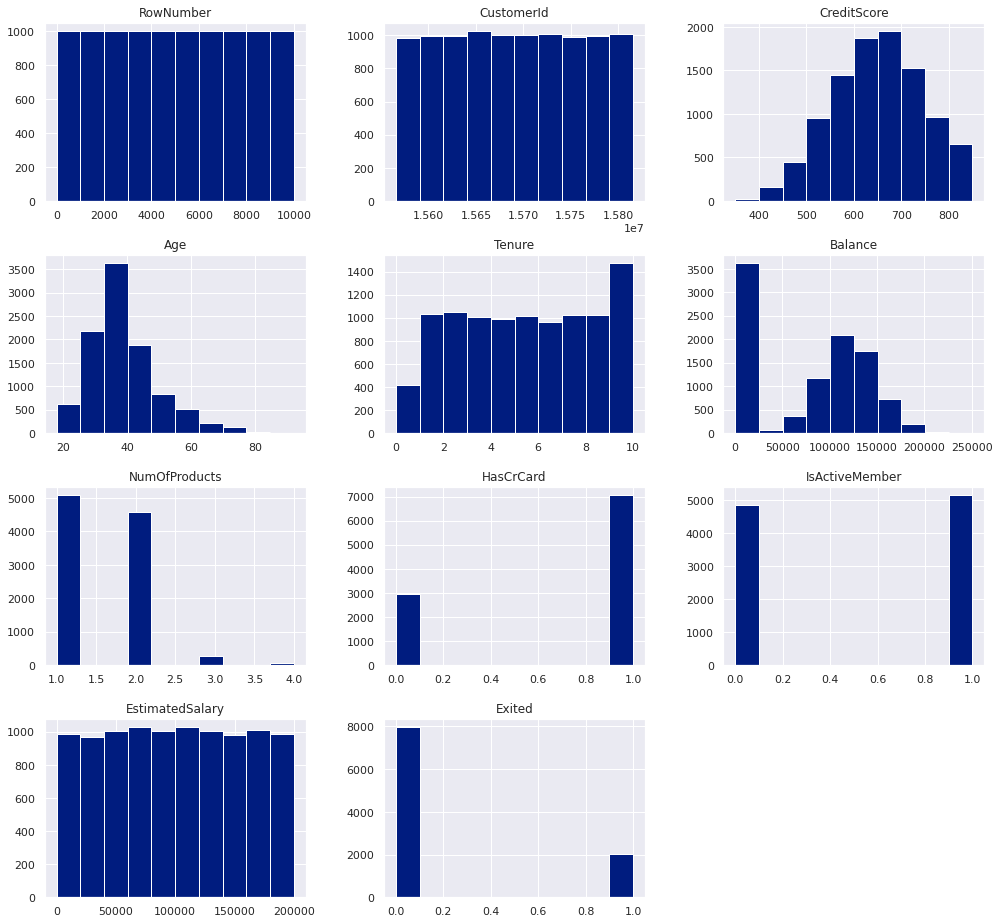

In [ ]:
arquivo.hist(figsize=(15,15));

Observa-se nos gráficos acima que 70% dos clientes possuem cartão de crédito e cerca de 51% fazem movimentação bancária constantemente.
Analisando a variável ‘Exited’, observa-se, também, que 20% dos clientes romperam seu contrato com a agência bancária.

In [ ]:
arquivo.shape

(10000, 14)

In [ ]:
arquivo.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


Matriz de correlação: 


,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,1.000000,0.004202,0.005840,0.000783,-0.006495,-0.009067,0.007246,0.000599,0.012044,-0.005988,-0.016571
CustomerId,0.004202,1.000000,0.005308,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
CreditScore,0.005840,0.005308,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,0.000783,0.009497,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,-0.006495,-0.014883,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,-0.009067,-0.012419,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.007246,0.016972,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,0.000599,-0.014025,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.012044,0.001665,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.005988,0.015271,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097


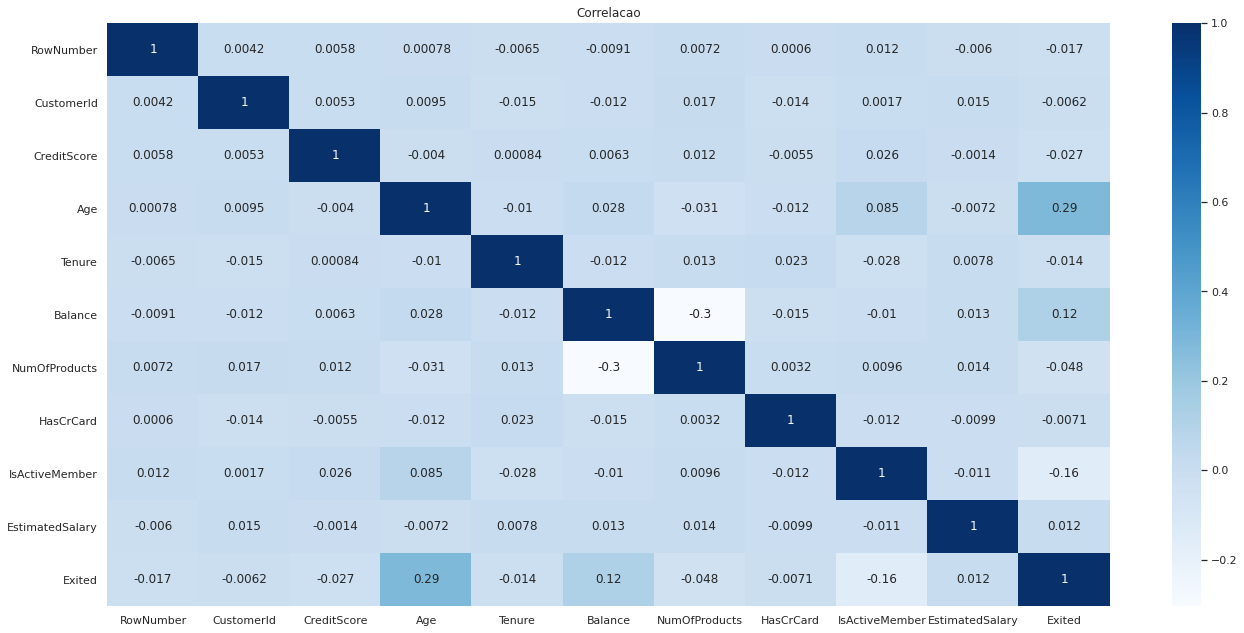



>>>> Pode-se verificar através do gráfico uma correlação maior entre as variáveis idade e saldo bancário com a variável Exited


In [ ]:
df_correlation  = arquivo.corr() ; print('Matriz de correlação: ') ; display(df_correlation)
plt.figure(figsize = (20,10)) 
sns.heatmap(df_correlation, cmap="Blues", xticklabels=df_correlation.columns, yticklabels=df_correlation.columns, annot=True)
plt.title('Correlacao') ; plt.show()
print('\n' )
print('\033[1m' + '>>>> Pode-se verificar através do gráfico uma correlação maior entre as variáveis idade e saldo bancário com a variável Exited' + '\033[0m' )

A maioria dos clientes que deixaram o banco tinham um relacionamento de 1 a 9 anos com o banco.


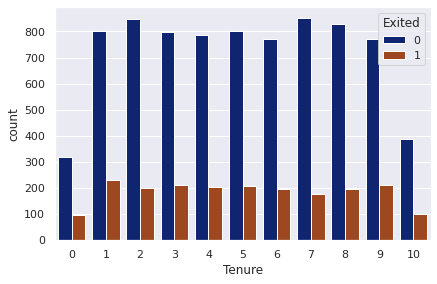

In [ ]:
sns.countplot(x='Tenure', hue='Exited', data=arquivo);
print('A maioria dos clientes que deixaram o banco tinham um relacionamento de 1 a 9 anos com o banco.')

A maioria dos clientes que deixaram o banco eram do sexo feminino.


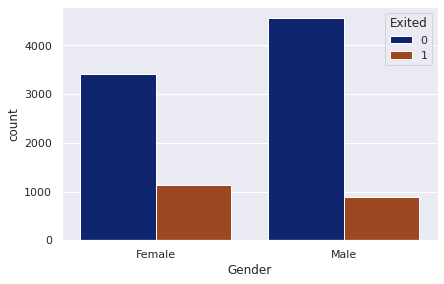

In [ ]:
sns.countplot(x='Gender', hue='Exited', data=arquivo);
print('A maioria dos clientes que deixaram o banco eram do sexo feminino.')

A maioria dos clientes que deixaram o banco eram alemães.


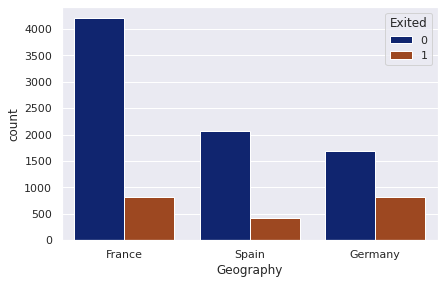

In [ ]:
sns.countplot(x='Geography', hue='Exited', data=arquivo);
arquivo['Geography'].value_counts()
print('A maioria dos clientes que deixaram o banco eram alemães.')


A maioria dos clientes que deixaram o banco não eram alemães do sexo femino.


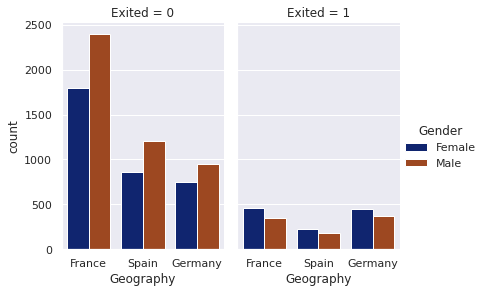

In [ ]:
g = sns.catplot(x="Geography", hue="Gender", col="Exited",
                data=arquivo, kind="count",
                height=4, aspect=.7);
print('A maioria dos clientes que deixaram o banco não eram alemães do sexo femino.')

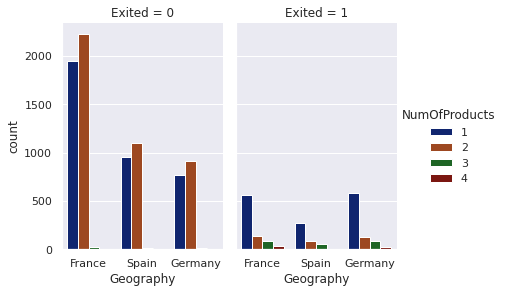

In [ ]:
g = sns.catplot(x="Geography", hue="NumOfProducts", col="Exited",
                data=arquivo, kind="count",
                height=4, aspect=.7);


A maioria dos clientes que fecharam suas contas são alemães e franceses predominantemente do sexo feminino, possuem apenas 1 produto, não é membro ativo, possui cartão de crédito e foram clientes por 1 a 9 anos.



A maioria dos clientes que deixaram o banco possuiam cartão de crédito.


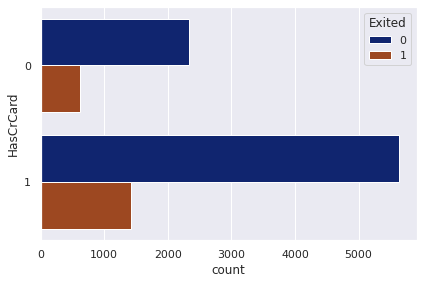

In [ ]:
sns.countplot(y='HasCrCard', hue='Exited', data=arquivo)
print('A maioria dos clientes que deixaram o banco possuiam cartão de crédito.')

A maioria dos clientes que deixaram o banco não eram membros ativos.


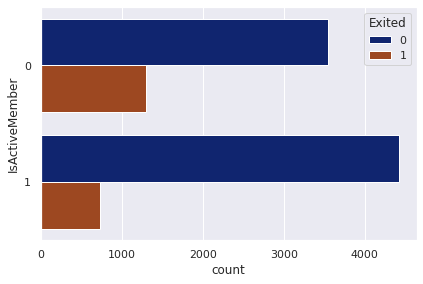

In [ ]:
sns.countplot(y='IsActiveMember', hue='Exited', data=arquivo)

print('A maioria dos clientes que deixaram o banco não eram membros ativos.')

Exited
0    37.408389
1    44.837997
Name: Age, dtype: float64

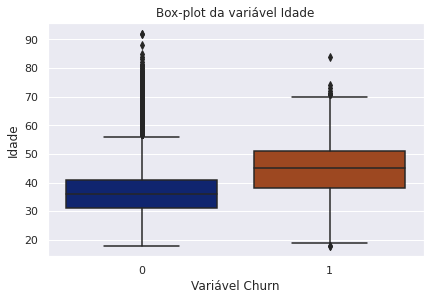

In [ ]:
sns.boxplot(x="Exited", y="Age", data=arquivo,palette="dark");
plt.title('Box-plot da variável Idade');
plt.xlabel('Variável Churn');
plt.ylabel('Idade');
arquivo.groupby(['Exited'])['Age'].mean()

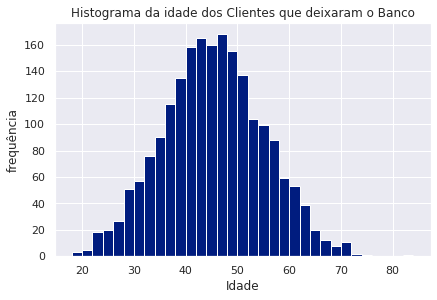

In [4]:
plt.hist(arquivo[arquivo['Exited'] == 1]['Age'], bins='auto')
plt.title('Histograma da idade dos Clientes que deixaram o Banco')
plt.xlabel('Idade')
plt.ylabel('frequência')
plt.show() 

Exited
0    651.853196
1    645.351497
Name: CreditScore, dtype: float64

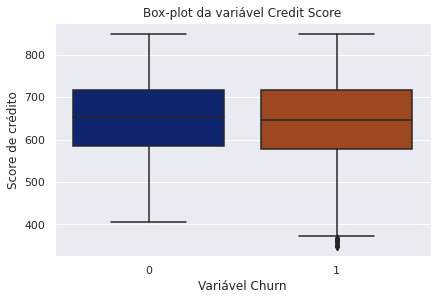

In [ ]:
sns.boxplot(x="Exited", y="CreditScore", data=arquivo,palette="dark");
plt.title('Box-plot da variável Credit Score');
plt.xlabel('Variável Churn');
plt.ylabel('Score de crédito');
arquivo.groupby(['Exited'])['CreditScore'].mean()

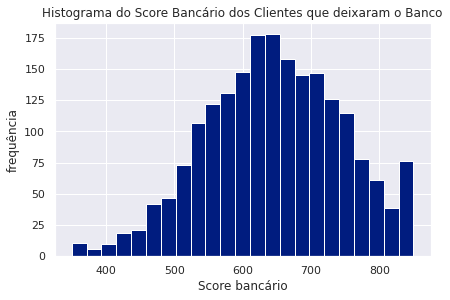

In [5]:
plt.hist(arquivo[arquivo['Exited'] == 1]['CreditScore'], bins='auto')
plt.title('Histograma do Score Bancário dos Clientes que deixaram o Banco')
plt.xlabel('Score bancário')
plt.ylabel('frequência')
plt.show() 

Exited
0     99738.391772
1    101465.677531
Name: EstimatedSalary, dtype: float64

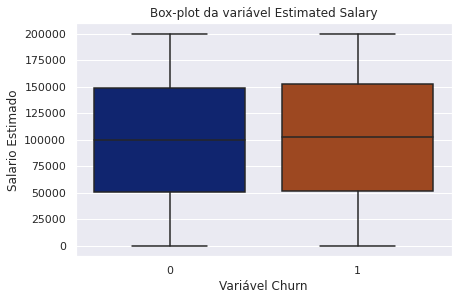

In [ ]:
sns.boxplot(x="Exited", y="EstimatedSalary", data=arquivo,palette="dark");
plt.title('Box-plot da variável Estimated Salary');
plt.xlabel('Variável Churn');
plt.ylabel('Salario Estimado');
arquivo.groupby(['Exited'])['EstimatedSalary'].mean()

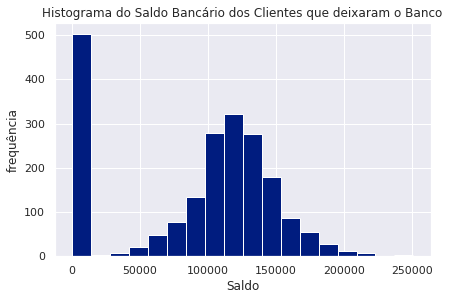

In [ ]:
plt.hist(arquivo[arquivo['Exited'] == 1]['Balance'], bins='auto')
plt.title('Histograma do Saldo Bancário dos Clientes que deixaram o Banco')
plt.xlabel('Saldo')
plt.ylabel('frequência')
plt.show()  

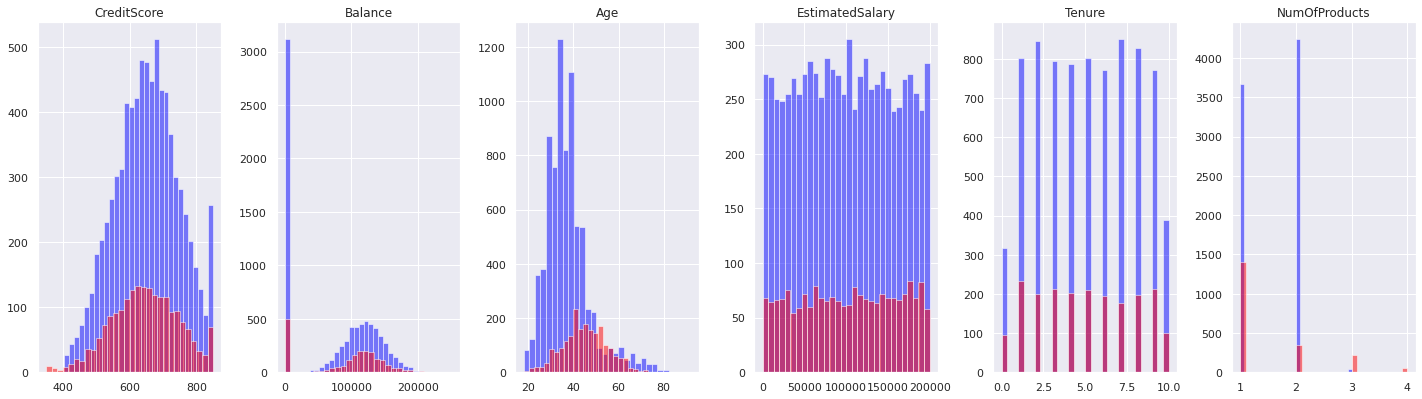

In [4]:
#Analisando as variáveis númericas juntas em relação à classe
arquivo['Churn']=arquivo['Exited'].replace([0,1],['Não','Sim'])
x_cont=['CreditScore','Balance','Age','EstimatedSalary','Tenure', 'NumOfProducts']
fig, ax = plt.subplots(1, 6, figsize=(22, 6));
arquivo[arquivo.Churn == "Não"][x_cont].hist( bins=30, color="blue", alpha=0.5, ax=ax);
arquivo[arquivo.Churn == "Sim"][x_cont].hist( bins=30, color="red", alpha=0.5, ax=ax);

Através da análise exploratória dos dados, conclui-se que clientes da Alemanha, do sexo feminino, em torno de 40 anos, que possuem cartão de crédito, que não são membros ativos, com apenas 1 produto do banco, com pouco ou nenhum saldo bancário e com score de crédito de cerca de 650, possuem uma tendência maior de cancelarem o serviço bancário.

Class 0: 7963
Class 1: 2037
Proportion: 3.91 : 1


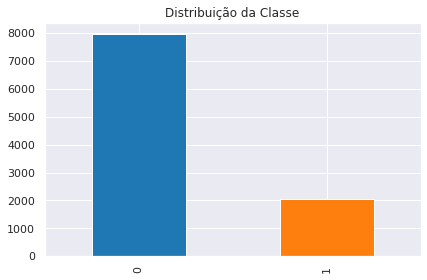

In [5]:
#Verificando a distribuição da classe: Fraude = 1 Normal = 0
count = arquivo.Exited.value_counts()
print('Class 0:', count[0])
print('Class 1:', count[1])
print('Proportion:', round(count[0] / count[1], 2), ': 1')
count.plot(kind='bar', title='Distribuição da Classe',color = ['#1F77B4', '#FF7F0E']);

Como podemos notar no gráfico acima as classes estão desbalanceadas na proporção de 3,91 de classe 0 para 1 de churn.

### 3.2 Preparação e limpeza dos dados

In [6]:
#Eliminando as colunas que não trazem informações importantes para a previsão de churn.
dados=arquivo.drop(columns=['CustomerId','RowNumber','Surname','Churn'])

In [7]:
#Dividindo o dataset por classes
class_0 = dados[dados['Exited'] == 0]
class_1 = dados[dados['Exited'] == 1]

In [8]:
#fazendo undersampling dos dados de classe 0 com a mesma quantidade de dados de classe 1
count_class_0, count_class_1 = dados.Exited.value_counts()
class_0_under = class_0.sample(count_class_1)
#juntando as classes balanceadas em uma única amostra do dataset
under_sampling = pd.concat([class_0_under, class_1], axis=0)

In [343]:
under_sampling.shape

(4074, 11)

Random under-sampling:
1    2037
0    2037
Name: Exited, dtype: int64


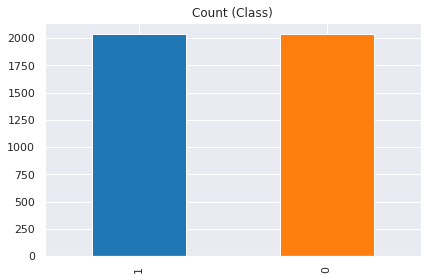

In [9]:
#Separando as variáveis independentes em X da variável dependente em y 
X=under_sampling.drop(columns=['Exited'], axis=1)
y=under_sampling['Exited']
#mostrando o resultado do undersampling na amostra balanceada
print('Random under-sampling:')
print(under_sampling.Exited.value_counts())
under_sampling.Exited.value_counts().plot(kind='bar', title='Count (Class)',color = ['#1F77B4', '#FF7F0E']);

In [345]:
#Criando variáveis independentes e dependentes
#y = dados['Exited']
#X = dados
#X = dados.drop('Exited',axis = 1)
#Variáveis Continuas
X_cont = ['CreditScore','Balance','Age','EstimatedSalary','Tenure']
#Variáveis Categóricas
#X_cat = list(set(X) - set(X_cont))
#X_dummies = X[X_cat]
#X_dummies


In [10]:
##Processamento das Variáveis categóricas
#Substituindo a variável sexo para 0 e 1
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X['Gender'] = le.fit_transform(X['Gender']) 
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
1765,766,Germany,1,43,6,112088.04,2,1,1,36706.56
3431,468,France,1,36,3,61636.97,1,0,0,107787.42
6741,613,Spain,1,44,9,100524.69,1,1,1,47298.95
2461,637,France,1,40,8,125470.81,1,1,1,174536.17
3517,771,Spain,1,18,1,0.00,2,0,0,41542.95


In [11]:
#trocando variáveis categóricas por valores binários
X_dummies = pd.get_dummies (data = X, columns = ['Geography','NumOfProducts'] )
X_dummies.head()

,CreditScore,Gender,Age,Tenure,Balance,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,NumOfProducts_1,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4
1765,766,1,43,6,112088.04,1,1,36706.56,0,1,0,0,1,0,0
3431,468,1,36,3,61636.97,0,0,107787.42,1,0,0,1,0,0,0
6741,613,1,44,9,100524.69,1,1,47298.95,0,0,1,1,0,0,0
2461,637,1,40,8,125470.81,1,1,174536.17,1,0,0,1,0,0,0
3517,771,1,18,1,0.00,0,0,41542.95,0,0,1,0,1,0,0


In [12]:
X_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4074 entries, 1765 to 9998
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        4074 non-null   int64  
 1   Gender             4074 non-null   int64  
 2   Age                4074 non-null   int64  
 3   Tenure             4074 non-null   int64  
 4   Balance            4074 non-null   float64
 5   HasCrCard          4074 non-null   int64  
 6   IsActiveMember     4074 non-null   int64  
 7   EstimatedSalary    4074 non-null   float64
 8   Geography_France   4074 non-null   uint8  
 9   Geography_Germany  4074 non-null   uint8  
 10  Geography_Spain    4074 non-null   uint8  
 11  NumOfProducts_1    4074 non-null   uint8  
 12  NumOfProducts_2    4074 non-null   uint8  
 13  NumOfProducts_3    4074 non-null   uint8  
 14  NumOfProducts_4    4074 non-null   uint8  
dtypes: float64(2), int64(6), uint8(7)
memory usage: 314.3 KB


### 3.3 Seleção de atributos

In [13]:
def featurextract(X_dummies,y):
    # feature extraction
    model = RandomForestClassifier(n_estimators=10)
    model.fit(X_dummies.values, y.values)
    RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                           criterion='gini', max_depth=None, max_features='auto',
                           max_leaf_nodes=None, max_samples=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=10,
                           n_jobs=None, oob_score=False, random_state=None,
                           verbose=0, warm_start=False)

    feature_importances = pd.DataFrame(model.feature_importances_,
                                       index = X_dummies.columns,
                                       columns=['Importancia']).sort_values('Importancia', ascending=False)

    feature_importances.plot.bar(figsize=(25,10))

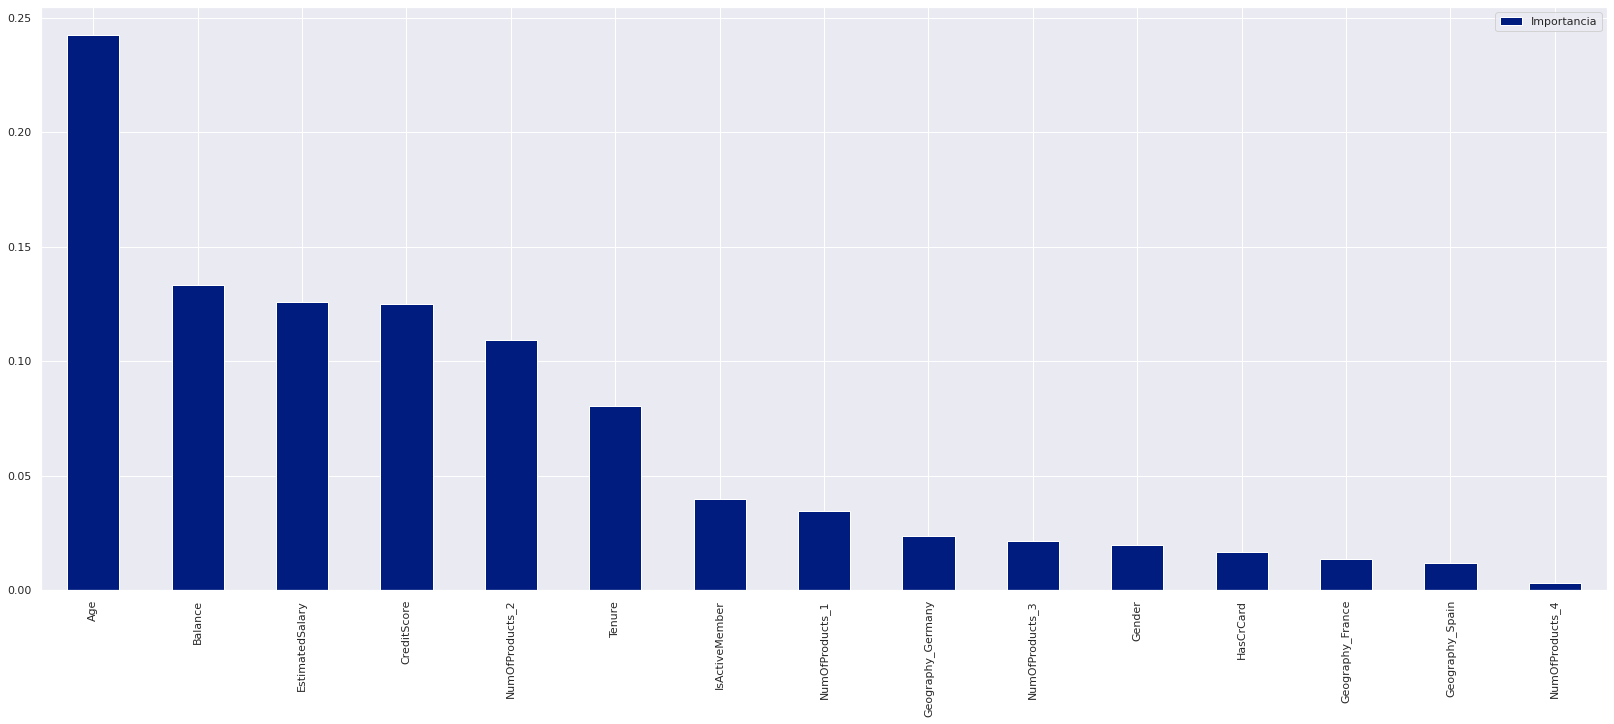

In [14]:
featurextract(X_dummies,y)

In [15]:
X_final=X_dummies.drop(columns=['NumOfProducts_4','Geography_France','Geography_Spain', 'HasCrCard'])
X_final

,CreditScore,Gender,Age,Tenure,Balance,IsActiveMember,EstimatedSalary,Geography_Germany,NumOfProducts_1,NumOfProducts_2,NumOfProducts_3
1765,766,1,43,6,112088.04,1,36706.56,1,0,1,0
3431,468,1,36,3,61636.97,0,107787.42,0,1,0,0
6741,613,1,44,9,100524.69,1,47298.95,0,1,0,0
2461,637,1,40,8,125470.81,1,174536.17,0,1,0,0
3517,771,1,18,1,0.00,0,41542.95,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9981,498,1,42,3,152039.70,1,53445.17,1,1,0,0
9982,655,0,46,7,137145.12,0,115146.40,1,1,0,0
9991,597,0,53,4,88381.21,0,69384.71,0,1,0,0
9997,709,0,36,7,0.00,1,42085.58,0,1,0,0


In [56]:
from sklearn.preprocessing import MinMaxScaler
X_cont=['CreditScore','Balance','Age','EstimatedSalary','Tenure']
scaler = MinMaxScaler()
X_final[X_cont] = scaler.fit_transform(X_final[X_cont])
X_final[X_cont]

,CreditScore,Balance,Age,EstimatedSalary,Tenure
1765,0.832,0.446747,0.378788,0.183612,0.6
3431,0.236,0.245665,0.272727,0.539281,0.3
6741,0.526,0.400659,0.393939,0.236613,0.9
2461,0.574,0.500087,0.333333,0.873273,0.8
3517,0.842,0.000000,0.000000,0.207811,0.1
...,...,...,...,...,...
9981,0.296,0.605982,0.363636,0.267367,0.3
9982,0.610,0.546617,0.424242,0.576103,0.7
9991,0.494,0.352259,0.530303,0.347124,0.4
9997,0.718,0.000000,0.272727,0.210527,0.7


In [57]:
# Separando em dados teste e treinamento 
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test  = train_test_split(X_final, y, test_size = 0.20, random_state = seed)#, stratify=y)

In [48]:
X_train=X_train.astype({"Balance":'int64',"EstimatedSalary":'int64',"CreditScore":'int64',"Age":'int64',"Tenure":'int64'})

### 3.4 Construção do modelo

In [79]:
def kfold_acuracia(X_train,y_train,seed,num_folds):
    # Definindo os valores para o número de folds

    print("[KFOLD]-Cross Validation 10 Folds das acurácias dos modelos.")
    seed=27
    # Preparando a lista de modelos obrigatórios do projeto
    modelos = []
    modelos.append(('Knn ', KNeighborsClassifier()))
    modelos.append(('DT', DecisionTreeClassifier()))
    modelos.append(('LR  ', LogisticRegression())) 
    modelos.append(('GBC ', GradientBoostingClassifier())) 
    modelos.append(('SVC ', SVC()))
    modelos.append(('RFC ', RandomForestClassifier()))

    # Avaliando cada modelo em um loop
    resultados = []
    nomes = []

    for nome, modelo in modelos:
        kfold = KFold(n_splits = num_folds, random_state = seed, shuffle=True)
        cv_results = cross_val_score(modelo, X_train,y_train, cv = kfold, scoring = 'accuracy')  
        resultados.append(cv_results)
        nomes.append(nome)
        print("%s: %f (%f)" % (nome, cv_results.mean(),cv_results.std()))
        
    # Boxplot para comparar os algoritmos
    fig = plt.figure(figsize=(6,4))
    fig.suptitle('Comparação de Algoritmos de Classificação')
    ax = fig.add_subplot(111)
    plt.boxplot(resultados) 
    ax.set_xticklabels(nomes)
    plt.show()
    return 

In [70]:
def kfold_auc(X_train,y_train,seed,num_folds):
    # Definindo os valores para o número de folds

    print("[KFOLD]-Cross Validation 10 Folds das acurácias dos modelos.")

    # Preparando a lista de modelos obrigatórios do projeto
    modelos = []
    modelos.append(('Knn ', KNeighborsClassifier()))
    modelos.append(('DT', DecisionTreeClassifier()))
    modelos.append(('LR  ', LogisticRegression())) 
    modelos.append(('GBC ', GradientBoostingClassifier())) 
    modelos.append(('SVC ', SVC()))
    modelos.append(('RFC ', RandomForestClassifier()))

    # Avaliando cada modelo em um loop
    resultados = []
    nomes = []

    for nome, modelo in modelos:
        kfold = KFold(n_splits = num_folds, random_state = seed, shuffle=True)
        cv_results = cross_val_score(modelo, X_train,y_train, cv = kfold, scoring = 'roc_auc')  
        resultados.append(cv_results)
        nomes.append(nome)
        print("%s: %f (%f)" % (nome, cv_results.mean(), cv_results.std()))
        
    # Boxplot para comparar os algoritmos
    fig = plt.figure(figsize=(6,4))
    fig.suptitle('Comparação de Algoritmos de Classificação')
    ax = fig.add_subplot(111)
    plt.boxplot(resultados) 
    ax.set_xticklabels(nomes)
    plt.show()
    return 

### 3.5 Avaliação do modelo

[KFOLD]-Cross Validation 10 Folds das acurácias dos modelos.
Knn : 0.737646 (0.026960)
DT: 0.706651 (0.026444)
LR  : 0.764034 (0.021712)
GBC : 0.779066 (0.022708)
SVC : 0.768023 (0.018573)
RFC : 0.775693 (0.017921)
XGB: 0.782748 (0.021497)


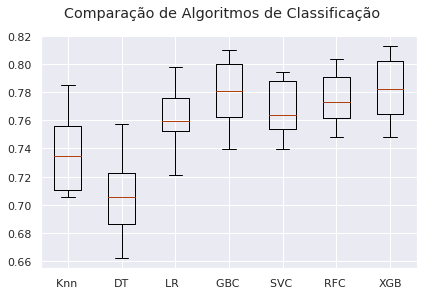

In [80]:
kfold_acuracia(X_train,y_train,seed,num_folds)

[KFOLD]-Cross Validation 10 Folds das acurácias dos modelos.
Knn : 0.806274 (0.023088)
DT: 0.712148 (0.029342)
LR  : 0.837473 (0.018956)
GBC : 0.865556 (0.015271)
SVC : 0.845390 (0.017780)
RFC : 0.858391 (0.017021)
XGB: 0.865887 (0.015557)


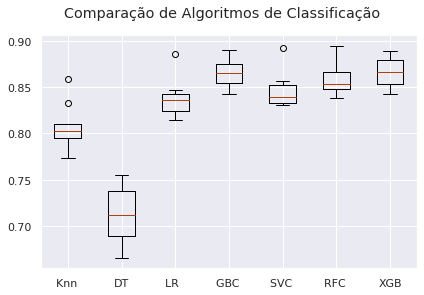

In [71]:
kfold_auc(X_train,y_train,seed,num_folds)

De acordo com as análises acima pode-se comprovar que inicialmente o modelo XGBoost apresenta os melhores scores de acurácia e auc.

### 3.4 Otimização do modelo

In [134]:
PARAMETERS = {"subsample":[0.5, 0.75, 1],
              "colsample_bytree":[0.5, 0.75, 1],
              "max_depth":[2, 6, 12],
              "min_child_weight":[1,5,15],
              "learning_rate":[0.3, 0.1, 0.03],
              "n_estimators":[100]}


model = XGBClassifier(n_estimators=100, n_jobs=-1)
model_gs = GridSearchCV(model,param_grid=PARAMETERS,cv=10,scoring="accuracy")
model_gs.fit(X_train,y_train)

print(model_gs.best_params_)
melhor_modelo = model_gs.best_estimator_

{'colsample_bytree': 1, 'learning_rate': 0.03, 'max_depth': 6, 'min_child_weight': 1, 'n_estimators': 100, 'subsample': 1}


In [135]:
y_pred_melhor_modelo = melhor_modelo.predict(X_test)

In [136]:
melhor_modelo.score(X_test, y_test)

0.7742331288343558

In [137]:
roc_auc_score(y_test, y_pred_melhor_modelo)

0.7701370178887837

In [138]:
print(classification_report(y_test, y_pred_melhor_modelo))

              precision    recall  f1-score   support

           0       0.78      0.82      0.80       443
           1       0.77      0.72      0.75       372

    accuracy                           0.77       815
   macro avg       0.77      0.77      0.77       815
weighted avg       0.77      0.77      0.77       815



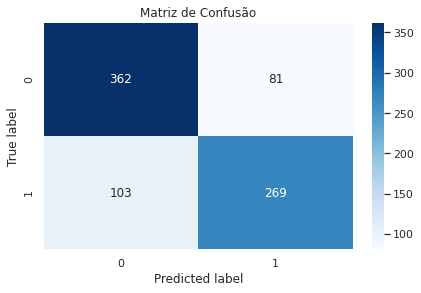

In [139]:
cm_melhor_modelo = confusion_matrix(y_test, y_pred_melhor_modelo)
sns.heatmap(cm_melhor_modelo, annot=True,cmap="Blues", fmt='d')
plt.title('Matriz de Confusão')
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
import pickle

pickle.dump(melhor_modelo, open('melhor_modelo_xgb.pkl', 'wb'))

## 4. Conclusão


O modelo XGBoostClassifier se mostrou mais eficiente para prever a probabilidade do cliente cancelar o serviço bancário.
O modelo se mostrou mais eficiente para classificar os verdadeiros negativos. No dataset de teste com 815 amostras, o modelo classificou corretamente os verdadeiros negativos 362 vezes e errou 103 vezes.Porém, os verdadeiros positivos que representam o Churn, o modelo classificou corretamente apenas 269 vezes e errou 81.
As variáveis mais importante para prever o churn foram idade, saldo bancário e salário estimado.


